In [1]:
# download on https://github.com/joojs/fairface

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('../datasets/fairface/fairface_label_train.csv')
val_df = pd.read_csv('../datasets/fairface/fairface_label_val.csv')

df = pd.concat([train_df, val_df], ignore_index=True)

# create new age column
df['raw_age'] = df['age']

In [4]:
df.head()

,file,age,gender,race,service_test,raw_age
0,train/1.jpg,50-59,Male,East Asian,True,50-59
1,train/2.jpg,30-39,Female,Indian,False,30-39
2,train/3.jpg,3-9,Female,Black,False,3-9
3,train/4.jpg,20-29,Female,Indian,True,20-29
4,train/5.jpg,20-29,Female,Indian,True,20-29


In [5]:
df['raw_age'].unique()

array(['50-59', '30-39', '3-9', '20-29', '40-49', '10-19', '60-69', '0-2',
       'more than 70'], dtype=object)

In [6]:
age_idx_mapping = {
    '0-2': '00-02',
    '3-9': '03-09',
    '10-19': '10-19',
    '20-29': '20-29',
    '30-39': '30-39',
    '40-49': '40-49',
    '50-59': '50-59',
    '60-69': '60-69',
    'more than 70': '70+',
}

In [7]:
df['age'] = df['raw_age'].apply(lambda row_data: age_idx_mapping[row_data])

<AxesSubplot:>

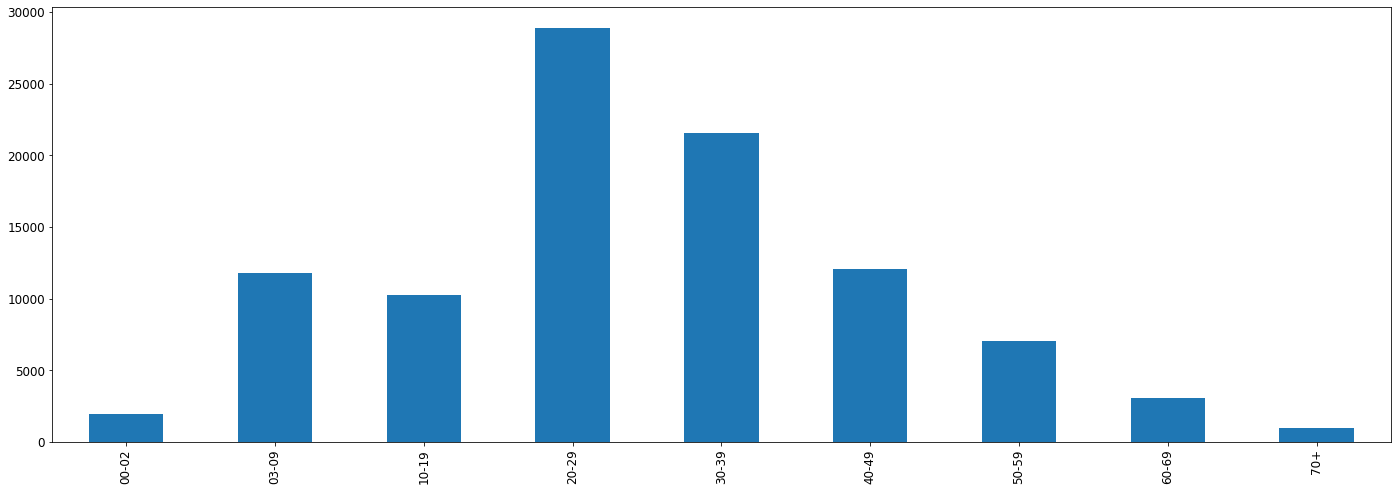

In [8]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [9]:
minor_ages = ['00-02','03-09','10-19']

In [10]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age in minor_ages:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [11]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  24.61%
